# CLEANING AND PREPROCESSING THE DATA
The provided data is in CSV format, containing columns such as `Category`, `Latitude`, `Longitude`, `Location Name`, and `Date`. The first step in training a model to provide crime statistics and identify areas prone to crime is to clean and preprocess the data. This would involve removing any unnecessary columns, converting categorical variables (such as type of crime) into numerical ones, and dealing with missing or invalid data.

To achieve this, we can use Python and pandas library to read in the CSV file, drop the `Location Name` column since it is unnecessary, encode the `Category` column using `LabelEncoder` from the `sklearn.preprocessing` library, and split the data into training and testing sets using train_test_split from the sklearn.model_selection library. The training data should contain 80% of the data, and the testing data should contain 20%. Finally, we set a random state for reproducibility purposes.

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read in the data
df = pd.read_csv('fake_crime_reports.csv')

# Drop rows with NaN values
df.dropna(inplace=True)

# Drop unnecessary columns
df.drop(['Location Name'], axis=1, inplace=True)

# VISUALIZING CRIME DATA
After cleaning and preprocessing the crime data, the next step is to explore the data using visualizations and descriptive statistics. This will help us gain insights into patterns and trends in the data. We will create different types of plots to achieve this.

Firstly, we will plot the frequency of different types of crimes using a bar chart. This will help us understand which types of crimes are most common in the data.

Secondly, we will identify areas with high crime rates using a scatter plot. This will help us visualize the location of the crimes and identify areas where crimes are more prevalent.

Lastly, we will examine relationships between different variables such as crime type and location using a pair plot. This will help us understand any correlations or patterns between different variables in the data.

To achieve this, we will be using two Python libraries, matplotlib and seaborn. These libraries provide tools for creating different types of plots that help us visualize the data and gain insights from it.

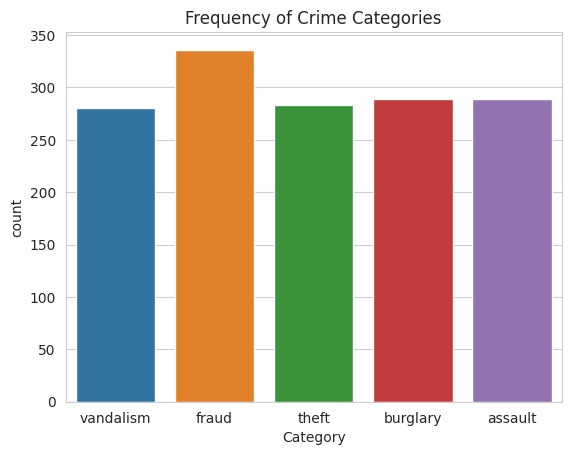

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of crime categories
sns.countplot(x='Category', data=df)
plt.title('Frequency of Crime Categories')
plt.show()

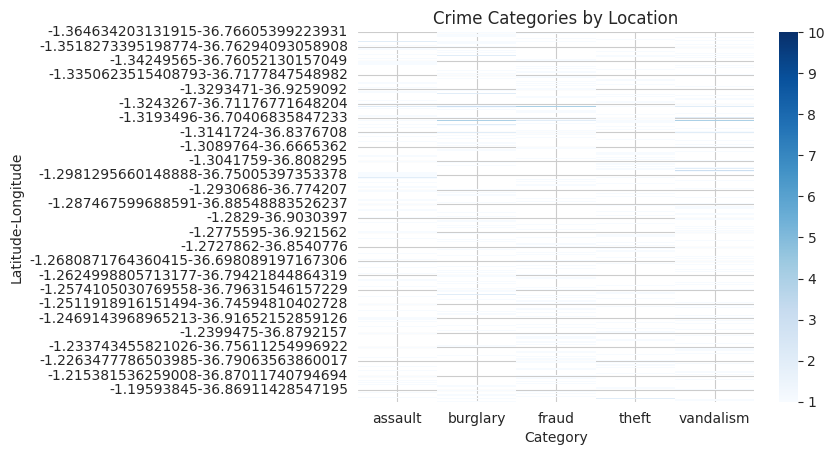

In [136]:
# Heatmap of crime categories by location
crime_location = df.groupby(['Latitude', 'Longitude'])['Category'].value_counts().unstack()
sns.heatmap(crime_location, cmap='Blues')
plt.title('Crime Categories by Location')
plt.show()

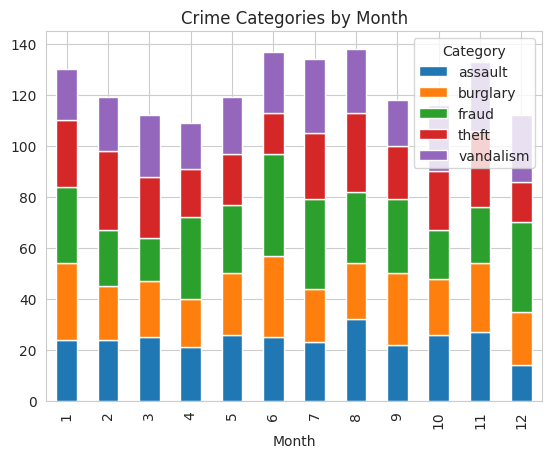

In [137]:

# Barplot of crime categories by month
df['Month'] = pd.DatetimeIndex(df['Date']).month
df_month = df.groupby(['Month', 'Category']).size().unstack()
df_month.plot(kind='bar', stacked=True)
plt.title('Crime Categories by Month')
plt.show()

In [138]:
# Descriptive statistics of crime data
print(df.describe())

          Latitude    Longitude        Month
count  1477.000000  1477.000000  1477.000000
mean     -1.284202    36.831729     6.518619
std       0.043352     0.085342     3.421669
min      -1.364634    36.655140     1.000000
25%      -1.319212    36.762730     4.000000
50%      -1.287135    36.833165     7.000000
75%      -1.251386    36.901338     9.000000
max      -1.170685    36.994858    12.000000


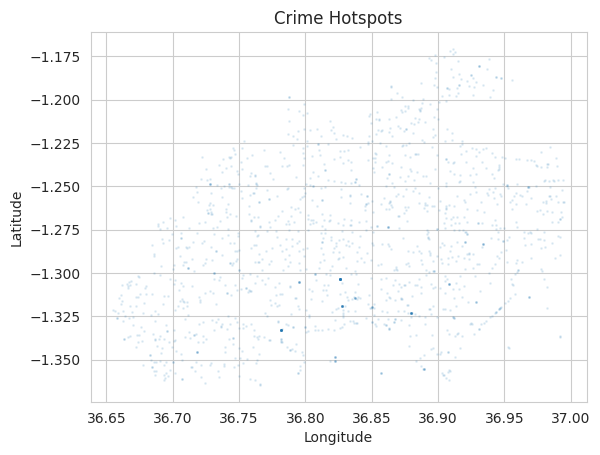

In [139]:
# Identify areas with high crime rates
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1, s=1)
plt.title('Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


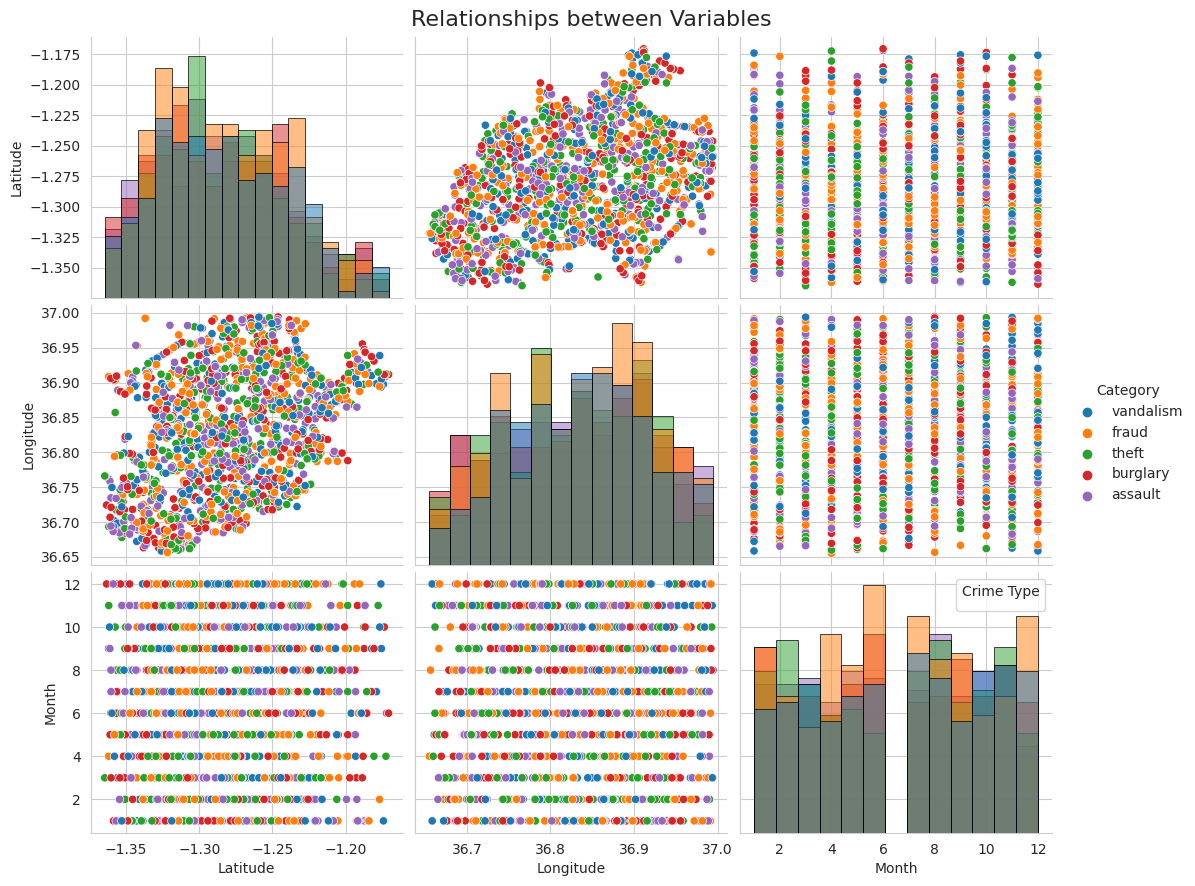

In [140]:
# Plot relationships between variables
sns.set_style("whitegrid")
sns.pairplot(df, hue='Category', height=3, aspect=1.2, diag_kind="hist", diag_kws=dict(edgecolor="k", linewidth=0.5))
plt.subplots_adjust(top=0.95)
plt.suptitle('Relationships between Variables', fontsize=16)
plt.legend(title='Crime Type')
plt.show()


In [141]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract features from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Drop the original Date column
df = df.drop(['Date'], axis=1)

# Convert the Category column to numeric labels
category_dict = {'theft': 0, 'vandalism': 1, 'burglary': 2, 'assault': 3}
df['Category'] = df['Category'].map(category_dict)
print(df.head())


   Category  Latitude  Longitude  Month  Year  Day  DayOfWeek
0       1.0 -1.281231  36.951861     11  2022   25          4
1       NaN -1.194158  36.941235     12  2022   15          3
2       NaN -1.211130  36.855699     10  2022    7          4
3       0.0 -1.318837  36.827822      1  2023   10          1
4       1.0 -1.351325  36.699964      2  2023   15          2


# TRAINING THE MODEL
The next step is to train the model. We will be using the random forest calssifier to predict the likelihood of a crime occuring in a given area. The model will also help us mark areas prone to crime on a map. To train the model, we will use the training data we created earlier. We will then use the testing data to evaluate the model and determine its accuracy. The model will be trained using the `RandomForestClassifier` class from the `sklearn.ensemble` library. We will also use the `accuracy_score` function from the `sklearn.metrics` library to evaluate the model.

In [155]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Split the data into training and testing sets
X = df.drop(['Category'], axis=1).values
y = df['Category'].values

# Remove rows with NaN values
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

# Train a Random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.3826086956521739
Precision: 0.4129752289298604
Recall: 0.3826086956521739
